In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np 
from sklearn.preprocessing import normalize
from progressbar import ProgressBar

train_data = np.load('train.npz')
val_data = np.load('val.npz')
test_data = np.load('test.npz')
test = test_data['x']
X = train_data['x'] #feature matrix
y = train_data['y'] #label matrix
val_X = val_data['x']
val_y = val_data['y']
location = train_data['locations'] #location matrix
times = train_data['times'] #time matrix
pbar = ProgressBar()

In [2]:
print(X.shape)
print(y.shape)
print(val_X.shape)
print(val_y.shape)
print(times.shape)
print(location.shape)

(72000, 8, 49)
(72000, 1)
(18000, 8, 49)
(18000, 1)
(72000,)
(72000, 2)


# Question 1: Implement a simple baseline where the historical average for each region is predicted against the validation set 

In [3]:
from sklearn.metrics import mean_squared_error
region_cnt_dict = {} 
region_sum_dict = {} 
region_mean_dict = {} 

for i, y_i in enumerate(train_data["y"]): 
    for i in train_data['locations'][i] :
        if i not in region_cnt_dict:
            region_cnt_dict[i]=0
            region_sum_dict[i]=0
        else:
            region_cnt_dict[i]+=1
            region_sum_dict[i]+=y_i
for region, r_sum in region_sum_dict.items(): 
    region_mean_dict[region] = r_sum / region_cnt_dict[region] 

In [4]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X,y)
dumb_pred = dummy.predict(val_X)

#reporting the rmse and mape

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

dummy_mse = mean_squared_error(val_y, dumb_pred)
dummy_rmse = np.sqrt(dummy_mse)
dummy_scores = cross_val_score(dummy, val_X, val_y, cv=5, scoring='neg_mean_squared_error')
dummmy_rmse = np.sqrt(-dummy_scores)

print('Cross-validation RMSE Scores')
display_scores(dummy_rmse)
print('\n')
print('RMSE:', dummy_rmse)

Cross-validation RMSE Scores
Scores: 0.08598892714142381
Mean: 0.08598892714142381
Standard Deviation: 0.0


RMSE: 0.08598892714142381


In [5]:
pd.DataFrame(y)

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
71995,0.051813
71996,0.150259
71997,0.103627
71998,0.279793


 # Questions 2 and 3
 ## 2. Extract features from the temporal data and use linear regression to predict demand on the validation set. Report the RMSE
 ## 3. Extract features from the temporal data and use XGBOOST to predict demand on the validation set. Report the RMSE

In [6]:

#reshaping to extract features and fit to regressors
X_d2 = train_data['x'][:, :, 24] 
val_X_d2 = val_data['x'][:, :, 24]
#chose 24 since the target region (region i) is at the center of the 7*7 map. Thus, k=24 is the region i's demand value.

#normalizing data
#norm_X = normalize(X_d2)
#norm_y = normalize(y)
#norm_val_X = normalize(val_X_d2)
#norm_val_y = normalize(val_y)

#rint(norm_X.shape, norm_y.shape)
#print(norm_val_X.shape, norm_val_y.shape)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor

lin_reg = LinearRegression()
lin_reg.fit(X_d2,y)
lasso = Lasso()
lasso.fit(X_d2,y)
ridge = Ridge()
ridge.fit(X_d2,y)
xgb_reg = XGBRegressor()
xgb_reg.fit(X_d2,y)
lin_pred = lin_reg.predict(val_X_d2)
lasso_pred = lasso.predict(val_X_d2)
ridge_pred = ridge.predict(val_X_d2)
xgb_pred = xgb_reg.predict(val_X_d2)

lin_reg_scores = cross_val_score(lin_reg,X_d2, y, cv=5, scoring = 'neg_mean_squared_error')
lasso_scores = cross_val_score(lasso, X_d2, y, cv=5, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge, X_d2, y, cv=5, scoring = 'neg_mean_squared_error')
xgb_scores = cross_val_score(xgb_reg, X_d2, y, cv=5, scoring = 'neg_mean_squared_error')

lin_rmse = np.sqrt(-lin_reg_scores)
lasso_rmse = np.sqrt(-lasso_scores)
ridge_rmse = np.sqrt(-ridge_scores)
xgb_rmse = np.sqrt(-xgb_scores)

lin_mse = mean_squared_error(val_y, lin_pred)
rmse_lin = np.sqrt(lin_mse)
lasso_mse = mean_squared_error(val_y, lasso_pred)
rmse_lasso = np.sqrt(lasso_mse)
ridge_mse = mean_squared_error(val_y, ridge_pred)
rmse_ridge = np.sqrt(ridge_mse)
xgb_mse = mean_squared_error(val_y, xgb_pred)
rmse_xgb = np.sqrt(xgb_mse)

print('Cross-validation RMSE scores for linear regression')
display_scores(lin_rmse)
print('\n')
print('Cross-validation RMSE scores for lasso')
display_scores(lasso_rmse)
print('\n')
print('Cross-validation RMSE scores for ridge')
display_scores(ridge_rmse)
print('\n')
print('Cross-validation rmse scores for xgboost')
display_scores(xgb_rmse)
print('\n')
print('RMSE for Linear Regression:', rmse_lin)
print('RMSE for Lasso:', rmse_lasso)
print('RMSE for Ridge:', rmse_ridge)
print('RMSE for XGBoost:', rmse_xgb)

Cross-validation RMSE scores for linear regression
Scores: [0.02550744 0.02978776 0.02874696 0.02762409 0.02564588]
Mean: 0.027462426971250443
Standard Deviation: 0.001685534854306905


Cross-validation RMSE scores for lasso
Scores: [0.05859078 0.07102052 0.06993465 0.066013   0.06331302]
Mean: 0.06577439594500713
Standard Deviation: 0.00452877781936311


Cross-validation RMSE scores for ridge
Scores: [0.02549326 0.0298045  0.02874195 0.02762677 0.0256606 ]
Mean: 0.027465417191639925
Standard Deviation: 0.0016895943601378653


Cross-validation rmse scores for xgboost
Scores: [0.02530465 0.02888746 0.02843208 0.02735126 0.0251539 ]
Mean: 0.027025870390225838
Standard Deviation: 0.0015502062961659313


RMSE for Linear Regression: 0.028346572445341688
RMSE for Lasso: 0.0701381777964299
RMSE for Ridge: 0.02835192123903229
RMSE for XGBoost: 0.02841631360643217


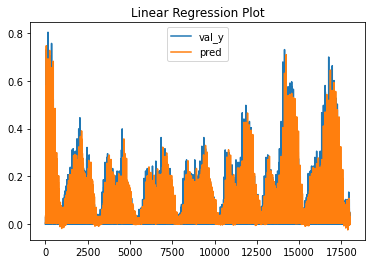

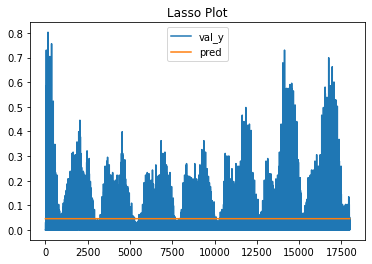

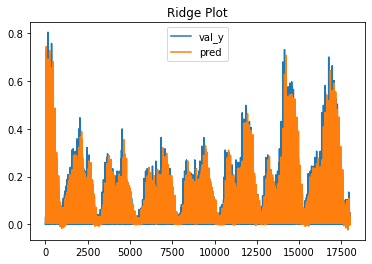

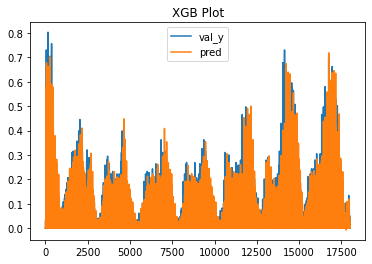

In [8]:
plt.title('Linear Regression Plot')
plt.plot(val_y)
plt.plot(lin_pred)
plt.legend(["val_y", "pred"])
plt.show()

plt.title('Lasso Plot')
plt.plot(val_y)
plt.plot(lasso_pred)
plt.legend(["val_y", "pred"])
plt.show()

plt.title('Ridge Plot')
plt.plot(val_y)
plt.plot(ridge_pred)
plt.legend(["val_y", "pred"])
plt.show()

plt.title('XGB Plot')
plt.plot(val_y)
plt.plot(xgb_pred)
plt.legend(["val_y", "pred"])
plt.show()



# Implement a basic Recurrent Neural Network (RNN) to predict demand on the validation set. Report the RMSE 

In [9]:
def visualize_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

inputs = X
targets = y

Epoch 1/150
2250/2250 [==============================] - 3s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0747 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416
Epoch 2/150
2250/2250 [==============================] - 3s 1ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0375
Epoch 3/150
2250/2250 [==============================] - 3s 1ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 9.8219e-04 - val_root_mean_squared_error: 0.0313
Epoch 4/150
2250/2250 [==============================] - 3s 1ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 8.7055e-04 - val_root_mean_squared_error: 0.0295
Epoch 5/150
2250/2250 [==============================] - 3s 1ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 7.7721e-04 - val_root_mean_squared_error: 0.0279
Epoch 6/150
2250/2250 [==============================] - 3s 1ms/step - loss: 9.3623e-04 - root_mean_squared_error

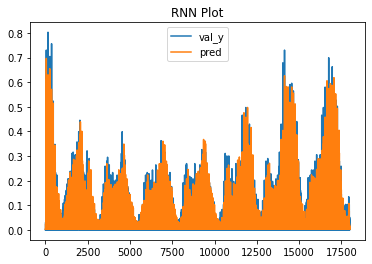

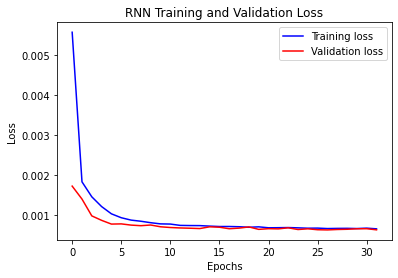

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Conv2D
from sklearn.metrics import mean_squared_error

learning_rate = 0.001


callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('../models/model.h5', save_best_only=True, 
                             save_weights_only=False)]




rnn_model = Sequential(
    [
        keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])),
        keras.layers.SimpleRNN(16),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1),
        keras.layers.Activation('sigmoid')
    ]
)
rnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse",
             metrics=[tf.keras.metrics.RootMeanSquaredError()])
rnn_history = rnn_model.fit(X,y, epochs=150,
                    callbacks=callbacks,
                    validation_data=(val_X,val_y))
rnn_pred = rnn_model.predict(val_X)
rnn_mse = mean_squared_error(val_y,rnn_pred)
rnn_rmse = np.sqrt(rnn_mse)


print('\n')
print("Validation RMSE for RNN Model:",rnn_rmse)
print('\n')

plt.title('RNN Plot')
plt.plot(val_y)
plt.plot(rnn_pred)
plt.legend(["val_y", "pred"])
plt.show()


visualize_loss(rnn_history, "RNN Training and Validation Loss")

# Implement a basic LSTM Model to predict demand on the validation set. Report the RMSE

Epoch 1/150
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0042 - root_mean_squared_error: 0.0648 - val_loss: 8.4743e-04 - val_root_mean_squared_error: 0.0291
Epoch 2/150
2250/2250 [==============================] - 7s 3ms/step - loss: 8.4657e-04 - root_mean_squared_error: 0.0291 - val_loss: 7.0865e-04 - val_root_mean_squared_error: 0.0266
Epoch 3/150
2250/2250 [==============================] - 7s 3ms/step - loss: 7.1069e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.4437e-04 - val_root_mean_squared_error: 0.0254
Epoch 4/150
2250/2250 [==============================] - 7s 3ms/step - loss: 6.5738e-04 - root_mean_squared_error: 0.0256 - val_loss: 6.5324e-04 - val_root_mean_squared_error: 0.0256
Epoch 5/150
2250/2250 [==============================] - 8s 3ms/step - loss: 6.2094e-04 - root_mean_squared_error: 0.0249 - val_loss: 5.8596e-04 - val_root_mean_squared_error: 0.0242
Epoch 6/150
2250/2250 [==============================] - 8s 3ms/step - loss: 5.9813e-04 -

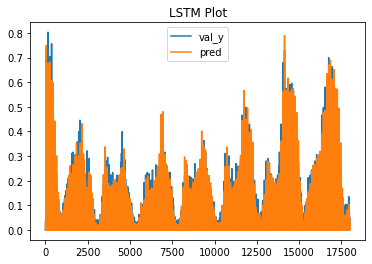

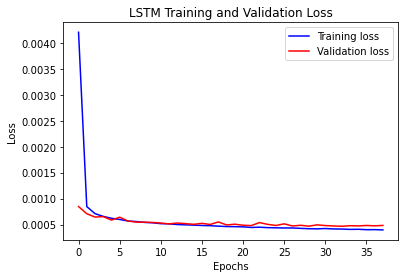

In [15]:
lstm_model = Sequential(
    [
        keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])),
        keras.layers.LSTM(128),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1),
        keras.layers.Activation('sigmoid')
    ]
)
lstm_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse",
             metrics=[tf.keras.metrics.RootMeanSquaredError()])
lstm_history = lstm_model.fit(X,y, epochs=150,
                    callbacks=callbacks,
                    validation_data=(val_X,val_y),
                        verbose=1)
lstm_pred = lstm_model.predict(val_X)
lstm_mse = mean_squared_error(val_y,lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)

print('\n')
print("Validation RMSE for LSTM Model:",lstm_rmse)
print('\n')

plt.title('LSTM Plot')
plt.plot(val_y)
plt.plot(lstm_pred)
plt.legend(["val_y", "pred"])
plt.show()

visualize_loss(lstm_history, "LSTM Training and Validation Loss")

In [16]:
test_predictions = lstm_model.predict(test)
pred_df = pd.DataFrame(test_predictions)

In [21]:
pred_df

,0
0,0.000012
1,0.000002
2,0.000006
3,0.000037
4,0.000031
...,...
1595,0.008416
1596,0.020207
1597,0.019783
1598,0.019724


In [27]:
pred_df.to_csv(r'richard_cruz_labels.csv',header=False, index=False)
